# ADNI Jacobian Maps Data Handling

In [11]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

Get the sample data.

In [9]:
data_dir = "/Data/adni_jacobian_maps/ADNI"
sample_dir = os.path.join(data_dir, ".nii_subsample")

sample_paths = [os.path.join(sample_dir, sample) for sample in os.listdir(sample_dir) if sample[-4:] == ".nii"]

View the samples.

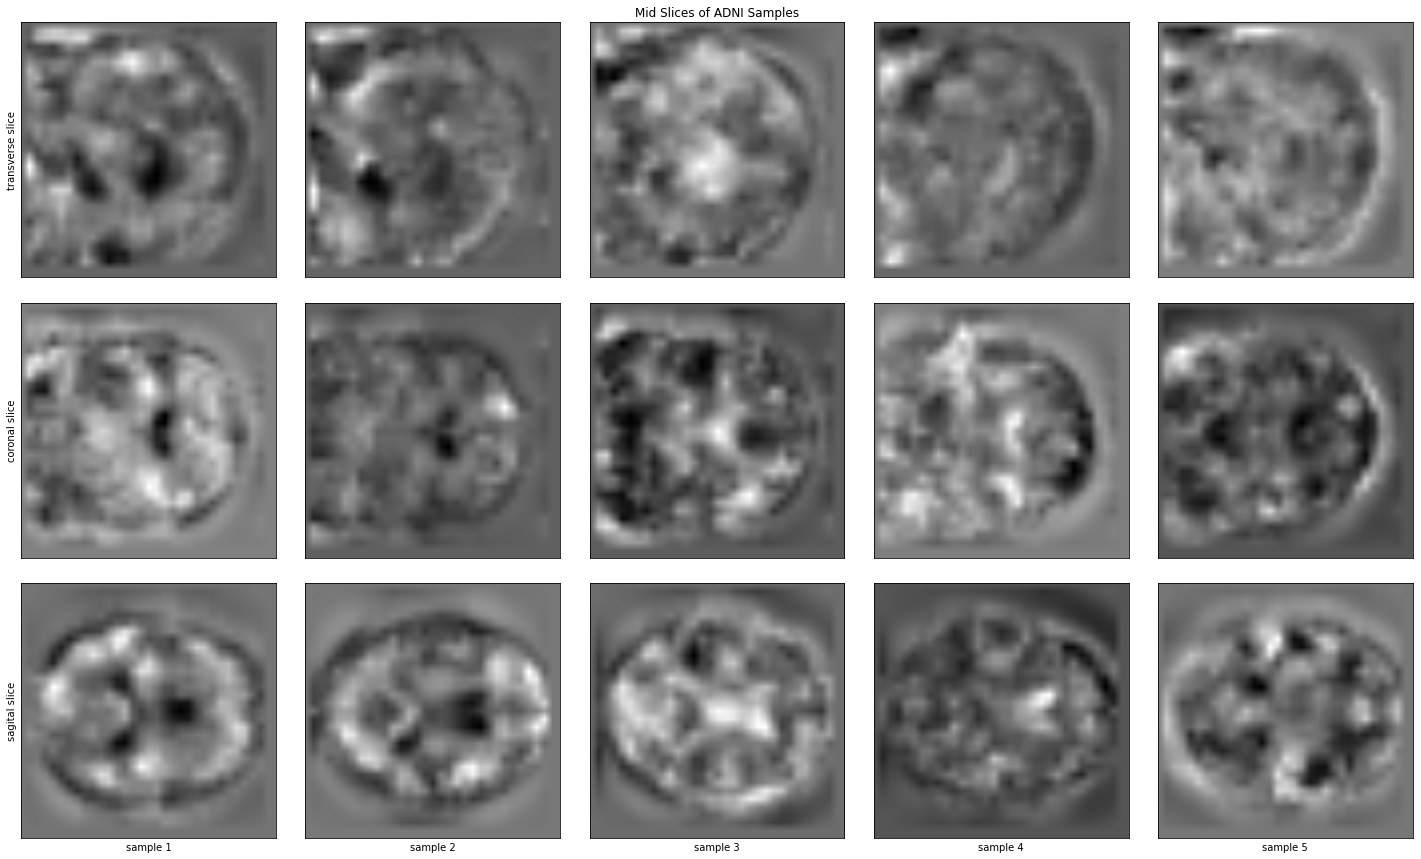

In [66]:
fig, ax = plt.subplots(figsize=(25, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.title("Mid Slices of ADNI Samples")
plt.xticks([])
plt.yticks([])
plt.box(None)

for i, sample in enumerate(sample_paths):
    nii = nib.load(sample)
    volume = nii.get_fdata()
    trans_slice = ("transverse", volume[volume.shape[0] // 2, :, :])
    coron_slice = ("coronal", volume[:, volume.shape[1] // 2, :])
    sagit_slice = ("sagital", volume[:, :, volume.shape[2] // 2])
    
    for j, (name, slice) in enumerate([trans_slice, coron_slice, sagit_slice]):
        ax = fig.add_subplot(3, 5, i+1+j*5)
        ax = plt.imshow(slice, cmap="gray")
        ax = plt.xticks([])
        ax = plt.yticks([])
        if i == 0:
            ax = plt.ylabel("{} slice".format(name))    
        if name == "sagital":
            ax = plt.xlabel("sample {}".format(i+1))